## Wine quality

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [43]:
!wget https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/esercizi/winequality.csv

--2022-04-08 15:52:16--  https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/esercizi/winequality.csv
Resolving frenzy86.s3.eu-west-2.amazonaws.com (frenzy86.s3.eu-west-2.amazonaws.com)... 52.95.150.158
Connecting to frenzy86.s3.eu-west-2.amazonaws.com (frenzy86.s3.eu-west-2.amazonaws.com)|52.95.150.158|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 100951 (99K) [text/csv]
Saving to: ‘winequality.csv.1’

winequality.csv.1   100%[===================>]  98.58K   630KB/s    in 0.2s    

2022-04-08 15:52:16 (630 KB/s) - ‘winequality.csv.1’ saved [100951/100951]



In [44]:
# loading the dataset to a Pandas DataFrame
df = pd.read_csv('winequality.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [45]:
# number of rows & columns in the dataset
df.shape

(1599, 12)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


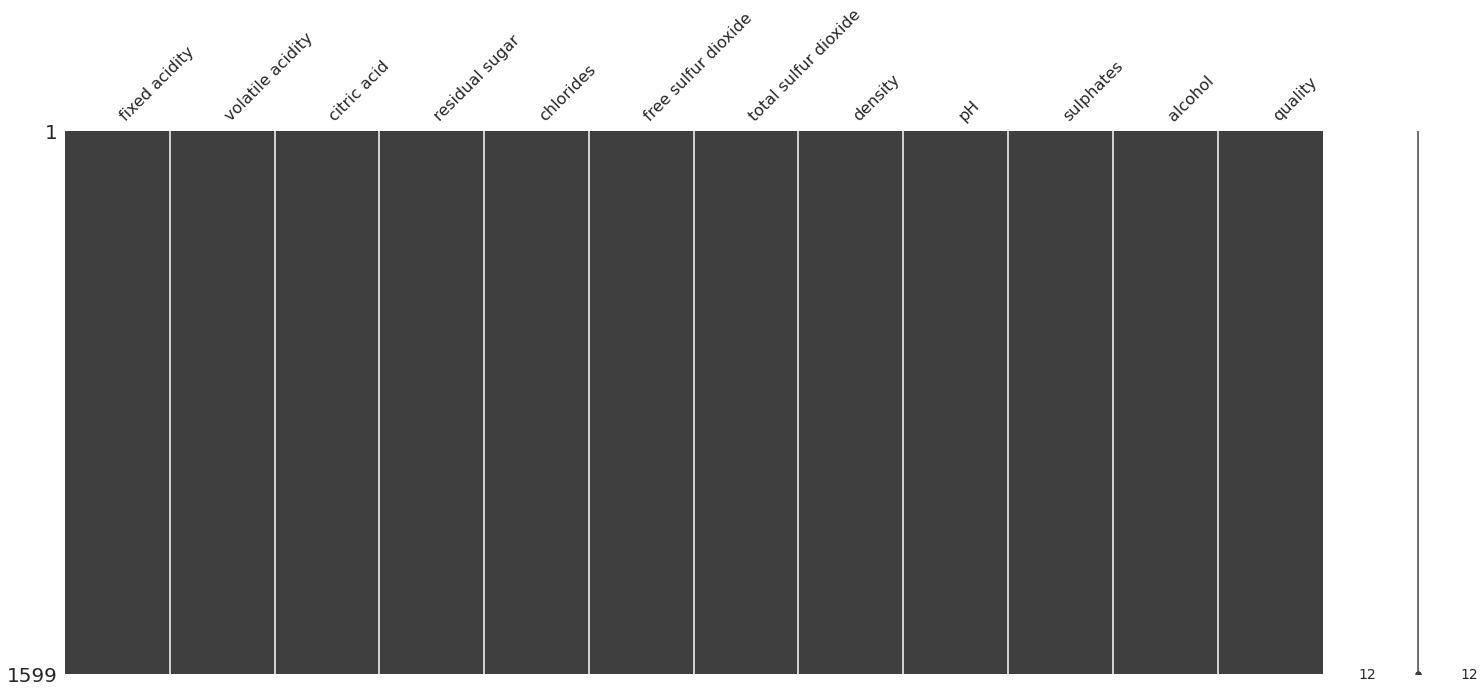

In [47]:
import missingno as msno
msno.matrix(df)

In [48]:
# checking for missing values
#df.isnull().sum().sum()
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Data Analysis and Visulaization

In [49]:
# statistical measures of the dataset
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


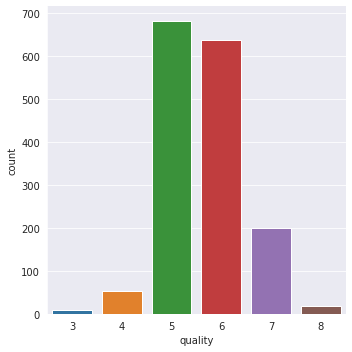

In [50]:
import seaborn as sns
# number of values for each quality
sns.catplot(x='quality', data = df, kind = 'count')

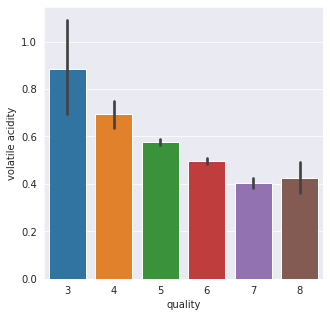

In [51]:
# volatile acidity vs Quality
plt.figure(figsize=(5,5))

sns.barplot(x='quality', y = 'volatile acidity', data = df)

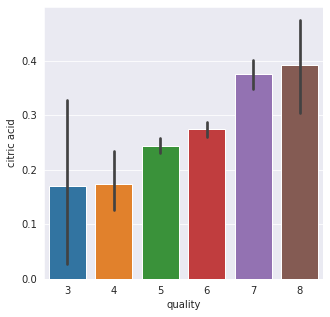

In [52]:
# citric acid vs Quality
plt.figure(figsize=(5,5))

sns.barplot(x='quality', y = 'citric acid', data = df)

Data Preprocessing

## Creare due classi

In [53]:
df['quality']= df['quality'].apply(lambda y_value: 1 if y_value>=7 else 0)

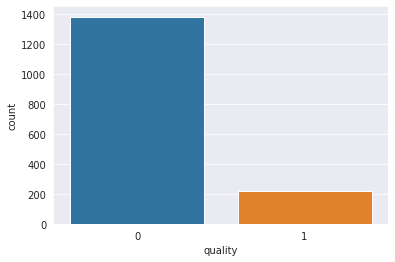

In [54]:
sns.countplot(df['quality']);

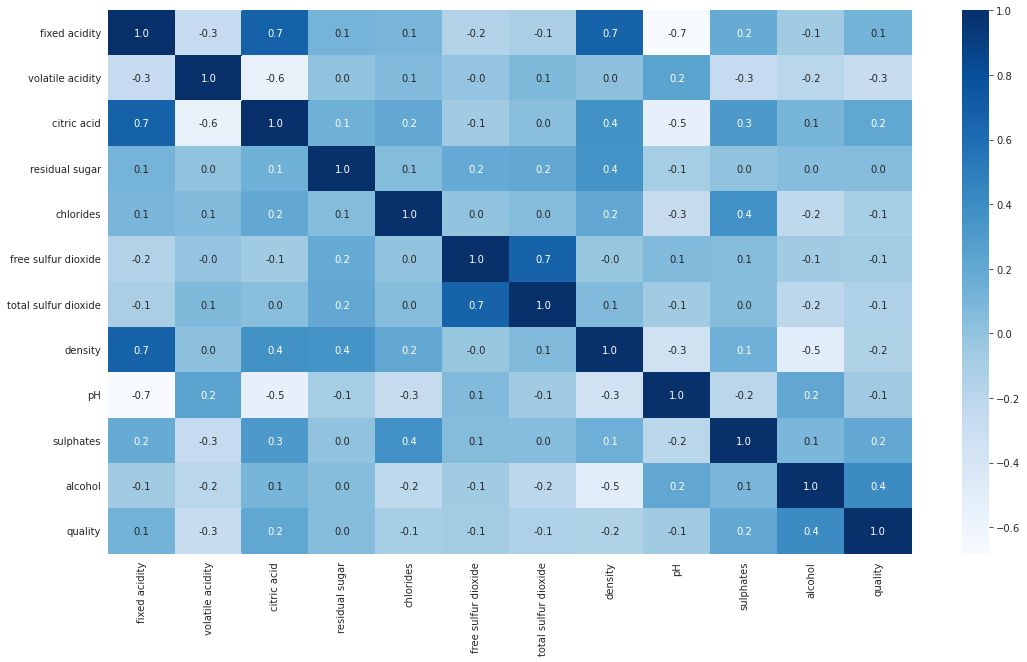

In [55]:
# constructing a heatmap to understand the correlation between the columns
plt.figure(figsize=(18,10))

sns.heatmap(df.corr(), fmt = '.1f', annot = True, cmap = 'Blues');

In [56]:
sns.pairplot(df,hue='quality');

Output hidden; open in https://colab.research.google.com to view.

In [57]:
# separate the data and Label
X_ = df.drop('quality',axis=1)

sc = StandardScaler()
standardized_data = sc.fit_transform(X_)

X = standardized_data
X

array([[-0.52835961,  0.96187667, -1.39147228, ...,  1.28864292,
        -0.57920652, -0.96024611],
       [-0.29854743,  1.96744245, -1.39147228, ..., -0.7199333 ,
         0.1289504 , -0.58477711],
       [-0.29854743,  1.29706527, -1.18607043, ..., -0.33117661,
        -0.04808883, -0.58477711],
       ...,
       [-1.1603431 , -0.09955388, -0.72391627, ...,  0.70550789,
         0.54204194,  0.54162988],
       [-1.39015528,  0.65462046, -0.77526673, ...,  1.6773996 ,
         0.30598963, -0.20930812],
       [-1.33270223, -1.21684919,  1.02199944, ...,  0.51112954,
         0.01092425,  0.54162988]])

In [58]:
y=df['quality']

In [59]:
y.value_counts()

0    1382
1     217
Name: quality, dtype: int64

Train & Test Split

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2,
                                                    random_state=667
                                                    )

In [61]:
print(X.shape, X_train.shape, X_test.shape)

(1599, 11) (1279, 11) (320, 11)


Model Training:

>1, train: 0.862, test: 0.872
>2, train: 0.862, test: 0.872
>3, train: 0.891, test: 0.881
>4, train: 0.892, test: 0.887
>5, train: 0.924, test: 0.881
>6, train: 0.952, test: 0.900
>7, train: 0.970, test: 0.894
>8, train: 0.978, test: 0.912
>9, train: 0.990, test: 0.909
>10, train: 0.995, test: 0.906
>11, train: 0.997, test: 0.903
>12, train: 0.998, test: 0.903
>13, train: 0.999, test: 0.900
>14, train: 1.000, test: 0.906
>15, train: 1.000, test: 0.903
>16, train: 1.000, test: 0.900
>17, train: 1.000, test: 0.903
>18, train: 1.000, test: 0.900
>19, train: 1.000, test: 0.900
>20, train: 1.000, test: 0.900


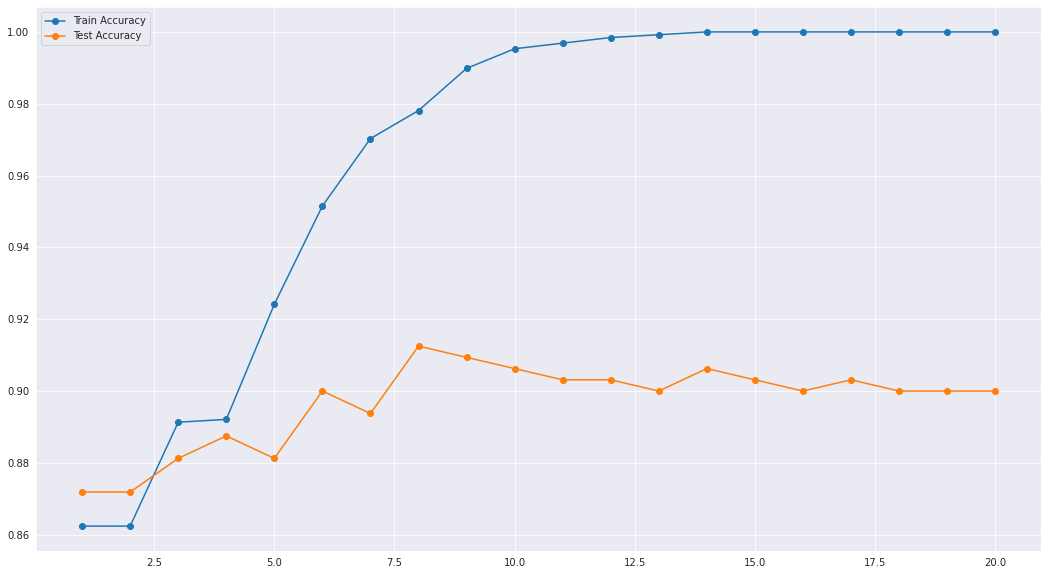

In [62]:
from sklearn.ensemble import RandomForestClassifier

train_scores, test_scores = [],[]
# define the tree depths to evaluate
values = [i for i in range(1, 21)]
# evaluate a decision tree for each depth
for i in values:
	# configure the model
	model = RandomForestClassifier(random_state=667, n_estimators=100,max_depth=i)
	# fit model on the training dataset
	model.fit(X_train, y_train)
	# evaluate on the train dataset
	train_y_pred = model.predict(X_train)
	train_acc = accuracy_score(y_train, train_y_pred)
	train_scores.append(train_acc)
	# evaluate on the test dataset
	test_y_pred = model.predict(X_test)
	test_acc = accuracy_score(y_test, test_y_pred)
	test_scores.append(test_acc)
	# summarize progress
	print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs tree depth

plt.figure(figsize=(18,10))
plt.plot(values, train_scores, '-o', label='Train Accuracy')
plt.plot(values, test_scores, '-o', label='Test Accuracy')
plt.legend()

In [63]:
##one of the best fit is with depth=8, train: 0.978, test: 0.912

In [64]:
classifier = RandomForestClassifier(random_state=667, n_estimators=100,max_depth=8)

In [65]:
classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, random_state=667)

Accuracy Score

Text(0.5, 0, 'Relative Importance')

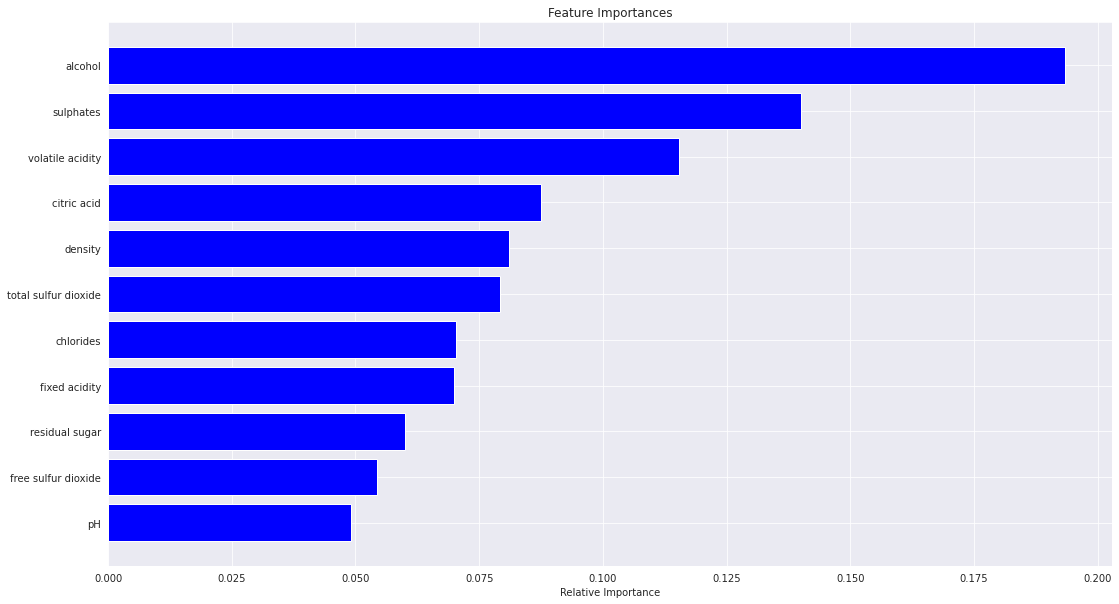

In [66]:
#Feature importance for Random Forest
features = X_.columns
importances = classifier.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(18,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

In [67]:
# accuracy score on the test data
y_pred = classifier.predict(X_test)
test_data_accuracy = accuracy_score(y_test,y_pred)

print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.9125


In [68]:
labels = ['Bad Quality', 'Good Quality']

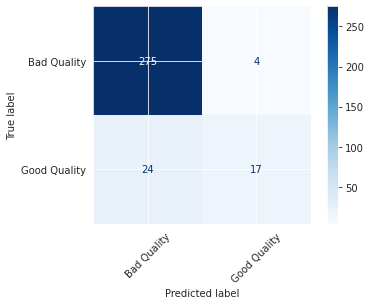

In [69]:
from sklearn.metrics import ConfusionMatrixDisplay

#labels = ['class1', 'class2']
cm = ConfusionMatrixDisplay.from_estimator(classifier, 
                                      X_test, 
                                      y_test,
                                      cmap='Blues',
                                      display_labels=labels,
                                      xticks_rotation=45,
                                      )
cm;

In [70]:
from sklearn.metrics import classification_report
#labels = ['class1', 'class2']
print(classification_report(y_test, y_pred, target_names=labels))

              precision    recall  f1-score   support

 Bad Quality       0.92      0.99      0.95       279
Good Quality       0.81      0.41      0.55        41

    accuracy                           0.91       320
   macro avg       0.86      0.70      0.75       320
weighted avg       0.91      0.91      0.90       320



## ROC Curves

In [71]:
!pip install plot-metric --quiet

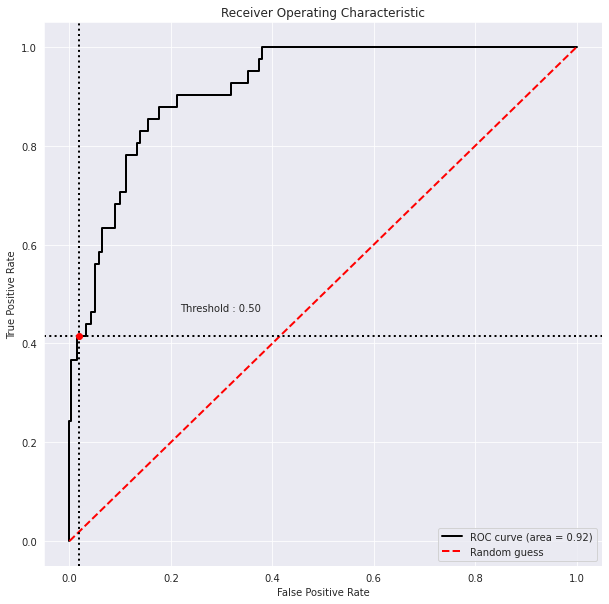

In [72]:
from plot_metric.functions import BinaryClassification
y_pred_proba = classifier.predict_proba(X_test)[::,1]

#labels = ['class1', 'class2']
bc = BinaryClassification(y_test, y_pred_proba, labels=labels)

# Figures
plt.figure(figsize=(10,10))
bc.plot_roc_curve();

In [73]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test,y_pred_proba)

0.9180872453885829

## P-R Curves

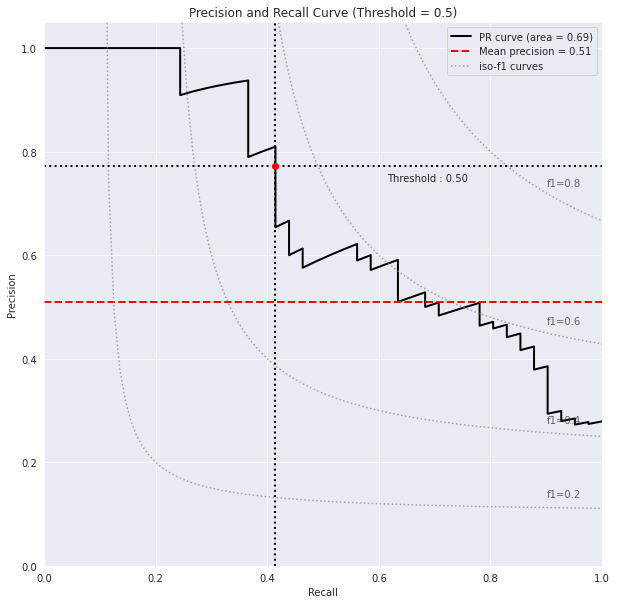

In [74]:
# Figures
plt.figure(figsize=(10,10))
bc.plot_precision_recall_curve();

Building a Predictive System

In [75]:
input_data = (7.5,0.5,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.8,10.5)

# changing the input data to a numpy array
input_np = np.asarray(input_data)

# reshape the data as we are predicting the label for only one instance
input_data_reshaped = input_np.reshape(1,-1)

prediction = classifier.predict(input_data_reshaped)
print(prediction[0])

if (prediction[0]==1):
  print('Good Quality Wine')
else:
  print('Bad Quality Wine')

0
Bad Quality Wine


## Feature selection

Check the Pipeline performance with feature selection

In [76]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline

featu=[]
for i in range(2,len(X_.columns)):
    rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=i)
    classifier = RandomForestClassifier(random_state=667, n_estimators=100,max_depth=8)
    pipe = Pipeline([
                    ('scaler', StandardScaler()),
                    ('featureselection',rfe),
                    ('classifier',classifier)
                    ])
    pipe.fit(X_train,y_train)
    test_y_pred = pipe.predict(X_test)
    test_acc = accuracy_score(y_test, test_y_pred)
    y_pred_proba = pipe.predict_proba(X_test)[::,1]
    roc_auc = roc_auc_score(y_test,y_pred_proba)
    featu.append(roc_auc)
    # summarize progress
    print('feature selected %d, Acc.Test: %.3f, AUC: %.3f' % (i, test_acc, roc_auc ))

print('\n Best number of feature selection is: %d' % (np.argmax(featu) +2))

feature selected 2, Acc.Test: 0.891, AUC: 0.896
feature selected 3, Acc.Test: 0.884, AUC: 0.905
feature selected 4, Acc.Test: 0.897, AUC: 0.904
feature selected 5, Acc.Test: 0.900, AUC: 0.915
feature selected 6, Acc.Test: 0.894, AUC: 0.910
feature selected 7, Acc.Test: 0.894, AUC: 0.907
feature selected 8, Acc.Test: 0.906, AUC: 0.918
feature selected 9, Acc.Test: 0.900, AUC: 0.915
feature selected 10, Acc.Test: 0.897, AUC: 0.908

 Best number of feature selection is: 8


## Pipeline

### Always give not normalize data to train the Pipeline!

In [77]:
# X_= features not standardized
X_train, X_test, y_train, y_test = train_test_split(X_, y,
                                                    test_size = 0.25,
                                                    random_state=667
                                                    )

In [78]:
standardize = StandardScaler()
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5)
classifier = RandomForestClassifier(random_state=667, n_estimators=100,max_depth=8)

pipe = Pipeline([
                ('scaler', StandardScaler()),
                ('featureselection',rfe),
                ('classifier',classifier)
                ])
pipe.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('featureselection',
                 RFE(estimator=DecisionTreeClassifier(),
                     n_features_to_select=5)),
                ('classifier',
                 RandomForestClassifier(max_depth=8, random_state=667))])

In [79]:
input_data = [7.5,0.5,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.8,10.5]

prediction = pipe.predict([input_data])
print(prediction[0])

if (y_pred[0] == 0):
  print('Bad Quality Wine')
else:
  print('Good Quality Wine')

0
Bad Quality Wine


In [80]:
import joblib
joblib.dump(pipe,'pipe_wine.pkl')

['pipe_wine.pkl']

In [81]:
uploaded_model = joblib.load('pipe_wine.pkl')

uploaded_model.predict([input_data])[0] #0 means Diabetic

0